# Cypher Tutorial: Graph Querying for RAG Systems with Neo4j

Welcome to Cypher Query Language tutorial! This guide is designed for working with Graph Retrieval-Augmented Generation (RAG) systems. We'll combine practical examples with clear explanations, and you'll get hands-on experience using this Jupyter notebook. To make things easier to understand, we'll include visual diagrams of the knowledge graphs right in the notebook.

## Introduction to Cypher

**Cypher** is a declarative language that helps us work with graph databases. Think of it like SQL, but specifically made for graphs. It's mainly used with Neo4j, which is one of the most popular graph databases.

**Knowledge Graphs** are databases that store information in a way that explains the relationships between different pieces of information. Information is stored as nodes (entities) and relationships (edges) between them.

Before we dive into using Cypher with Graph RAGs, let's first understand the basic building blocks: knowledge graphs, how Graph RAGs work, and how Cypher helps us talk to these systems.

## Understanding Knowledge Graphs and Neo4j

### What is a Knowledge Graph?

A knowledge graph is a network of entities (nodes) connected by relationships (edges) that represents structured information. Key advantages include:

1.  **Relationship-Focused Data Model**: Knowledge graphs prioritize the explicit representation of *relationships* between data points. This allows you to see how things are connected, not just what they are. (e.g., "John is friends with Mary" is explicitly modeled).

2.  **Explicit Semantic Connections**: Relationships in a knowledge graph have well-defined meanings (e.g., "works at," "is a part of"). This makes the data's meaning clear and allows for more meaningful queries. Each relationship type provides explicit semantic meaning, instead of just implicit meaning based on a table join.

3.  **Adaptable Data Structure**: Knowledge graphs allow you to easily add new types of entities and relationships to your model without having to do major schema changes. This is important for dealing with evolving information.

4.  **Advanced Pathfinding & Pattern Matching**: The graph structure enables fast path discovery and pattern matching, making it easy to find indirect connections and complex relationships between entities.

5.  **Fast Relationship Traversal**: The graph database architecture enables rapid traversal of relationships because it uses direct pointers to connected nodes, not requiring an index to find related nodes. (Note: *indexes are used for property searches*)

6.  **Reliable and Consistent Data**: The underlying database (if using one) ensures that all changes to the knowledge graph are reliable and that data is always consistent, using ACID principles.

7.  **Graph-Optimized Storage and Operations**: The underlying storage mechanism is specifically designed to store and manage graph data efficiently, leading to optimized operations and efficient memory usage when working with complex graphs.



### Neo4j Architecture

Neo4j implements knowledge graphs through:


**Imagine a Network, Not a Table**

Forget tables, rows, and columns. Think of a social network: people (nodes) connected by relationships (like "friend of," "works at"). That's the core idea of a graph database, and Neo4j's architecture is built to handle this model efficiently.

**Key Components:**

1.  **Nodes (Vertices): The Entities**

    *   Each node represents an entity in your domain – such as people, places, products, or concepts.
    *   Each node holds properties, which are key-value pairs (e.g.,  `name: "Alice"`, `age: 30`, `city: "New York"`).
    *   Each node is uniquely identified by an internal ID (not necessarily the property key).

2.  **Relationships (Edges): The Connections**

    *   Relationships connect nodes and represent the associations between entities.
    *   Each relationship has a *type* (e.g., `FRIENDS_WITH`, `LOCATED_IN`, `PURCHASED`).
    *   Relationships can be directed (e.g., "Alice *follows* Bob") or undirected.
    *   Relationships can also have properties (e.g., a `FRIENDS_WITH` relationship could have a `since: 2020` property).

3. **The Graph:**

    *   The entire network of interconnected nodes and relationships forms a graph structure.
    *   The underlying storage is optimized for traversing these relationships, providing fast performance for finding connected data.
    *   Neo4j is schema-less, allowing you to add new nodes and relationships with different properties without needing predefined schemas.

4. **The Core Engine (Kernel):**

    *   The core engine is the central component that handles all database operations.
    *   This includes managing the storage of nodes and relationships, indexing for efficient data retrieval, executing Cypher queries, and ensuring data consistency through transactions.

5. **Cypher Query Language:**

    *   Cypher is the native query language for Neo4j.
    *   It's a declarative language, meaning you specify *what* you want to find without needing to specify *how* to execute the query.
    *   Cypher is intuitive and uses patterns to specify queries in a way that is natural for working with relationships.

6. **Neo4j Database:**

    *   The Neo4j database is the storage layer for the graph database.
    *   It stores the nodes and relationships in a way that is optimized for fast traversal.

7. **Indexes:**

    *   Please check the next section for more information about indexes.

8. **Neo4j Server:**

    *   The Neo4j server runs the core engine and provides an API for accessing the database.
    *   It manages connections from client applications and handles concurrent access.
    *   It exposes both a REST API and language-specific drivers for integration with different programming languages (Java, Python, JavaScript, etc.).

8. **Neo4j Browser:**

    *   The Neo4j Browser is a graphical user interface (GUI) for interacting with the database.
    *   It allows users to run Cypher queries, visualize results as graphs, manage the database, and view the data model.

**Why This Architecture Works:**

*   **Fast Traversal:**  By storing connections directly as relationships, Neo4j can traverse the graph much faster than relational databases.
*   **Flexibility:**  The schemaless nature allows for easy adaptation to changing data models.
*   **Relationship-Centric:**  Neo4j's architecture is specifically designed for managing and querying connected data.

### Indexes

Here's a breakdown of how indexes work in Neo4j and why they are important:

**Purpose of Indexes in Neo4j**

*   **Speed Up Data Retrieval:** Without indexes, Neo4j would have to scan every node and relationship in the database to find the data matching a query. This is extremely inefficient, especially for large graphs. Indexes allow Neo4j to quickly locate specific nodes and relationships based on their properties, drastically improving query performance.

*   **Accelerate Lookups:** When you query data by a specific property value (e.g., `WHERE name = 'Alice'`), an index allows Neo4j to quickly find the nodes or relationships that have that value, without having to examine the entire graph.

**Types of Indexes in Neo4j**

1.  **Node Indexes:**
    *   **Purpose:** Used to quickly find nodes based on the values of their properties.
    *   **Example:** Indexing nodes with the label `Person` by the property `email`. This speeds up queries that find users with a specific email.
    *   **Creation:** You specify the label and the property to be indexed when you create a node index.

2.  **Relationship Indexes:**
    *   **Purpose:** Used to find relationships based on their type and properties.
    *   **Example:** Indexing `FRIENDS_WITH` relationships based on a property `since`.
    *   **Creation:** You specify the relationship type and property when creating a relationship index.

3.  **Composite Indexes:**
    *   **Purpose:** Indexes based on multiple properties for both nodes and relationships.
    *   **Example:** A composite index on `Person` nodes on `firstName` and `lastName`.
    *   **Creation:** You can create composite indexes when you need to query data with multiple property conditions.

4.  **Full-text Indexes:**
    *   **Purpose:** Designed for searching text-based properties (e.g., searching for keywords in a document's content).
    *   **Example:** Indexing node with label `Article` on properties such as title or body
    *   **Creation:** Creates a special index that uses specific text search algorithms.

5. **Spatial Indexes:**
   * **Purpose:** Designed to perform geospatial queries.
   * **Example:** Indexing `Location` nodes based on longitude and latitude.
   * **Creation:** Enables queries based on proximity, containment, and other spatial relationships.

**How Indexes Work in Neo4j**

*   **B-Tree Structure (Primarily):** Most indexes in Neo4j are based on B-tree data structures. These are highly efficient for storing and retrieving data based on sorted property values.
*   **Index Lookup:** When a query uses an indexed property, Neo4j uses the index to quickly find the internal IDs of the nodes or relationships matching the given value.
*   **Traversal:** Neo4j uses these IDs to retrieve the data needed for the query.
*   **Automatic Index Selection:** The Neo4j query planner automatically decides when to use an existing index to optimize a query based on the query filters.

**Key Points:**

*   **Performance Impact:** Indexes are essential for fast query performance, especially with large datasets.
*   **Trade-offs:** While indexes improve read performance, they can slightly increase the time it takes to create and update data (since the indexes need to be updated as well).
*   **Automatic Indexes:** Neo4j automatically creates indexes on node IDs.
*   **Cypher Commands:** You create and manage indexes using Cypher commands like `CREATE INDEX ON :Label(property)`.
*   **Index Selection**: Neo4j query planner selects best index for given query automatically.


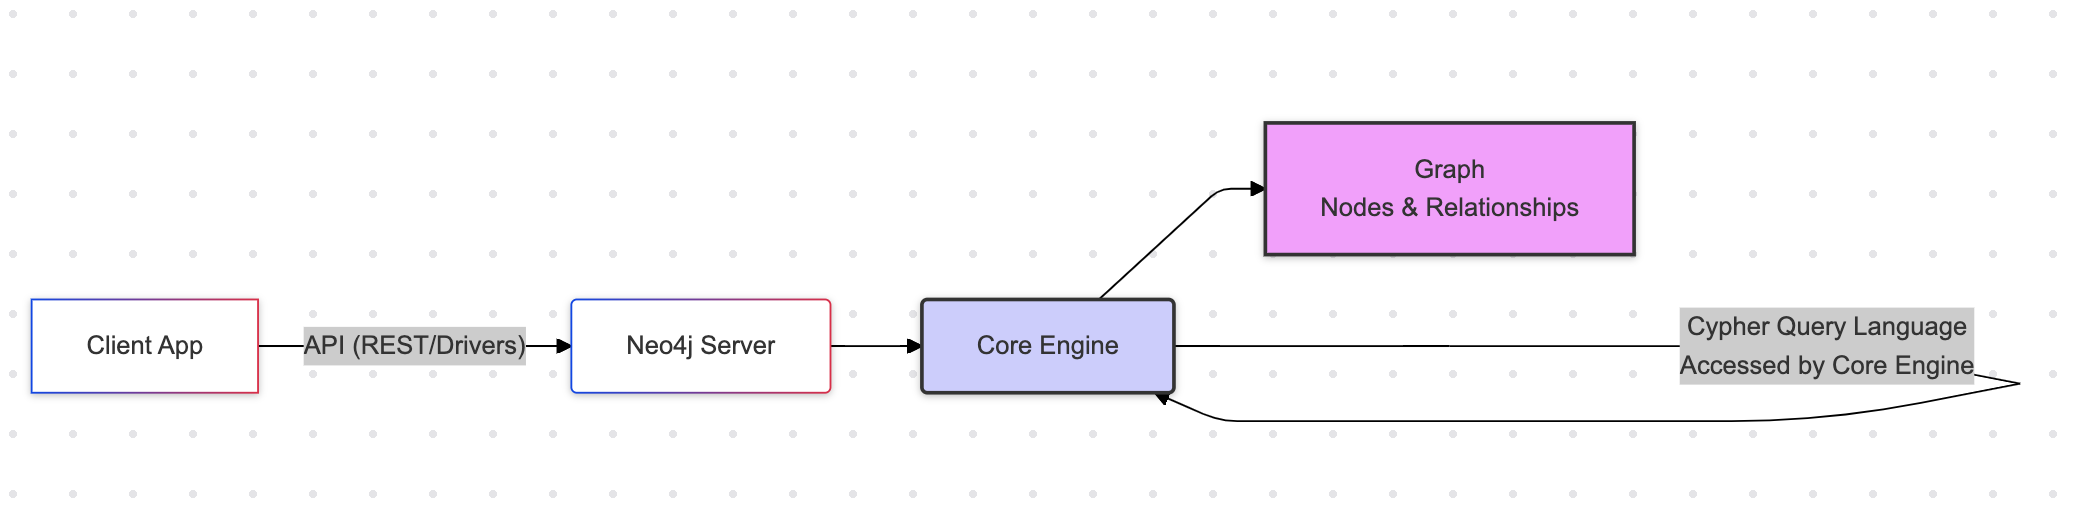


### How Neo4j Processes Queries

Neo4j processes queries in three main steps:
1. Planning: Analyzes query and creates optimized execution plan
2. Matching: Uses indexes and efficient graph traversal to find patterns
3. Result Generation: Streams results incrementally with memory-efficient pagination

## Environment Setup

**Install Dependencies:** We'll use the `neo4j` Python driver to connect to a Neo4j database and `py2neo` for easier interactions.

In [63]:
# Create a virtual environment called neo4j
! python3 -m venv neo4j

# Activate the virtual environment
! source neo4j/bin/activate

# Install the dependencies
! pip install neo4j py2neo -q

**Connect to Neo4j Database:** Ensure you have Neo4j installed and running locally. We'll connect to it using the default credentials.

In [64]:
from neo4j import GraphDatabase
from py2neo import Graph
from getpass import getpass

# Connect to Neo4j
uri = "bolt://localhost:7687"
username = "neo4j"
password = getpass("Enter your Neo4j password: ")

driver = GraphDatabase.driver(uri, auth=(username, password))
graph = Graph(uri, auth=(username, password))

**Helper Functions:** Now let's create the helper functions. 

In [65]:
# Graph Visualization
from yfiles_jupyter_graphs_for_neo4j import Neo4jGraphWidget
from neo4j import GraphDatabase

def visualize_graph(cypher_query: str):
    g = Neo4jGraphWidget(driver)
    g.show_cypher(cypher_query)

# Test the graph visualization
visualize_graph("MATCH (s)-[r]->(t) RETURN s,r,t LIMIT 10")

GraphWidget(layout=Layout(height='620px', width='100%'))

You can run cypher queries by using the the below function.

In [66]:
# Running a Cypher query
def run_cypher_query(cypher_query: str):
    data = graph.run(cypher_query)
    for record in data:
        print(record)

# Test the function to visualize all the nodes labels in the graph
run_cypher_query("MATCH (s) RETURN DISTINCT labels(s) AS label")

['Person']
['Company']
['City']
['Skill']
[]


Now let's create some sample data.

In [116]:
# First, clean everything
run_cypher_query("""
MATCH (n) 
DETACH DELETE n;
""")

# 1. Create all Person nodes
run_cypher_query("""
CREATE 
    (alice:Person {
        name: 'Alice Johnson',
        age: 30,
        email: 'alice@email.com',
        joined: date('2020-01-01')
    }),
    (bob:Person {
        name: 'Bob Smith',
        age: 35,
        email: 'bob@email.com',
        joined: date('2020-02-15')
    }),
    (carol:Person {
        name: 'Carol Williams',
        age: 28,
        email: 'carol@email.com',
        joined: date('2020-03-20')
    }),
    (dave:Person {
        name: 'Dave Brown',
        age: 42,
        email: 'dave@email.com',
        joined: date('2020-04-10')
    }),
    (eve:Person {
        name: 'Eve Davis',
        age: 25,
        email: 'eve@email.com',
        joined: date('2020-05-05')
    })
""")

# Verify Person nodes
run_cypher_query("""
MATCH (p:Person)
RETURN p.name as name
ORDER BY name;
""")

# 2. Create City nodes
run_cypher_query("""
CREATE 
    (nyc:City {
        name: 'New York',
        country: 'USA',
        population: 8400000
    }),
    (sf:City {
        name: 'San Francisco',
        country: 'USA',
        population: 874961
    }),
    (london:City {
        name: 'London',
        country: 'UK',
        population: 8982000
    })
""")

# Verify City nodes
run_cypher_query("""
MATCH (c:City)
RETURN c.name as name
ORDER BY name;
""")

# 3. Create Company nodes
run_cypher_query("""
CREATE 
    (techCorp:Company {
        name: 'TechCorp',
        founded: date('2010-01-01'),
        industry: 'Technology'
    }),
    (dataInc:Company {
        name: 'DataInc',
        founded: date('2015-06-15'),
        industry: 'Data Analytics'
    }),
    (webSoft:Company {
        name: 'WebSoft',
        founded: date('2012-03-20'),
        industry: 'Software'
    })
""")

# Verify Company nodes
run_cypher_query("""
MATCH (c:Company)
RETURN c.name as name
ORDER BY name;
""")

# 4. Create Skill nodes
run_cypher_query("""
CREATE 
    (python:Skill {name: 'Python', category: 'Programming'}),
    (java:Skill {name: 'Java', category: 'Programming'}),
    (ml:Skill {name: 'Machine Learning', category: 'Data Science'}),
    (neo4j:Skill {name: 'Neo4j', category: 'Database'})
""")

# Verify Skill nodes
run_cypher_query("""
MATCH (s:Skill)
RETURN s.name as name
ORDER BY name;
""")

# Create relationships with MERGE instead of CREATE to avoid duplicates
run_cypher_query("""
MATCH (alice:Person {name: 'Alice Johnson'})
MATCH (bob:Person {name: 'Bob Smith'})
MATCH (carol:Person {name: 'Carol Williams'})
MATCH (dave:Person {name: 'Dave Brown'})
MATCH (eve:Person {name: 'Eve Davis'})
MERGE (alice)-[:KNOWS {since: date('2019-01-01'), strength: 0.8}]->(bob)
MERGE (bob)-[:KNOWS {since: date('2019-02-01'), strength: 0.6}]->(carol)
MERGE (carol)-[:KNOWS {since: date('2019-03-01'), strength: 0.7}]->(dave)
MERGE (dave)-[:KNOWS {since: date('2019-04-01'), strength: 0.9}]->(eve)
MERGE (eve)-[:KNOWS {since: date('2019-05-01'), strength: 0.5}]->(alice)
MERGE (alice)-[:KNOWS {since: date('2019-06-01'), strength: 0.4}]->(carol)
""")

run_cypher_query("""
MATCH (alice:Person {name: 'Alice Johnson'})
MATCH (bob:Person {name: 'Bob Smith'})
MATCH (carol:Person {name: 'Carol Williams'})
MATCH (dave:Person {name: 'Dave Brown'})
MATCH (eve:Person {name: 'Eve Davis'})
MATCH (nyc:City {name: 'New York'})
MATCH (sf:City {name: 'San Francisco'})
MATCH (london:City {name: 'London'})
MERGE (alice)-[:LIVES_IN {since: date('2018-01-01')}]->(nyc)
MERGE (bob)-[:LIVES_IN {since: date('2018-02-01')}]->(sf)
MERGE (carol)-[:LIVES_IN {since: date('2018-03-01')}]->(london)
MERGE (dave)-[:LIVES_IN {since: date('2018-04-01')}]->(nyc)
MERGE (eve)-[:LIVES_IN {since: date('2018-05-01')}]->(sf)
""")

run_cypher_query("""
MATCH (alice:Person {name: 'Alice Johnson'})
MATCH (bob:Person {name: 'Bob Smith'})
MATCH (carol:Person {name: 'Carol Williams'})
MATCH (dave:Person {name: 'Dave Brown'})
MATCH (eve:Person {name: 'Eve Davis'})
MATCH (techCorp:Company {name: 'TechCorp'})
MATCH (dataInc:Company {name: 'DataInc'})
MATCH (webSoft:Company {name: 'WebSoft'})
MERGE (alice)-[:WORKS_AT {since: date('2020-01-15'), role: 'Software Engineer'}]->(techCorp)
MERGE (bob)-[:WORKS_AT {since: date('2020-02-20'), role: 'Data Scientist'}]->(dataInc)
MERGE (carol)-[:WORKS_AT {since: date('2020-03-25'), role: 'Developer'}]->(webSoft)
MERGE (dave)-[:WORKS_AT {since: date('2020-04-30'), role: 'Manager'}]->(techCorp)
MERGE (eve)-[:WORKS_AT {since: date('2020-05-10'), role: 'Analyst'}]->(dataInc)
""")

run_cypher_query("""
MATCH (alice:Person {name: 'Alice Johnson'})
MATCH (bob:Person {name: 'Bob Smith'})
MATCH (carol:Person {name: 'Carol Williams'})
MATCH (dave:Person {name: 'Dave Brown'})
MATCH (eve:Person {name: 'Eve Davis'})
MATCH (python:Skill {name: 'Python'})
MATCH (java:Skill {name: 'Java'})
MATCH (ml:Skill {name: 'Machine Learning'})
MATCH (neo4j:Skill {name: 'Neo4j'})
MERGE (alice)-[:HAS_SKILL {level: 'Expert', years: 5}]->(python)
MERGE (alice)-[:HAS_SKILL {level: 'Intermediate', years: 3}]->(java)
MERGE (bob)-[:HAS_SKILL {level: 'Expert', years: 4}]->(ml)
MERGE (carol)-[:HAS_SKILL {level: 'Advanced', years: 3}]->(neo4j)
MERGE (dave)-[:HAS_SKILL {level: 'Expert', years: 6}]->(java)
MERGE (eve)-[:HAS_SKILL {level: 'Intermediate', years: 2}]->(python)
""")

run_cypher_query("""
MATCH (techCorp:Company {name: 'TechCorp'})
MATCH (dataInc:Company {name: 'DataInc'})
MATCH (webSoft:Company {name: 'WebSoft'})
MATCH (nyc:City {name: 'New York'})
MATCH (sf:City {name: 'San Francisco'})
MATCH (london:City {name: 'London'})
MERGE (techCorp)-[:LOCATED_IN]->(nyc)
MERGE (dataInc)-[:LOCATED_IN]->(sf)
MERGE (webSoft)-[:LOCATED_IN]->(london)
""")

'Alice Johnson'
'Bob Smith'
'Carol Williams'
'Dave Brown'
'Eve Davis'
'London'
'New York'
'San Francisco'
'DataInc'
'TechCorp'
'WebSoft'
'Java'
'Machine Learning'
'Neo4j'
'Python'


In [117]:
run_cypher_query("""
MATCH (n)-[r]->(m)
RETURN type(r) as relationship_type, count(*) as count
ORDER BY relationship_type;
""")

'HAS_SKILL'	6
'KNOWS'	6
'LIVES_IN'	5
'LOCATED_IN'	3
'WORKS_AT'	5


This script creates:
1. Nodes with Labels:
- Person
- Company
- City
- Skill
2. Relationships:
- KNOWS (Person->Person)
- WORKS_AT (Person->Company)
- LIVES_IN (Person->City)
- HAS_SKILL (Person->Skill)
- LOCATED_IN (Company->City)
3. Properties:
- Persons: name, age, email, joined
- Companies: name, founded, industry
- Cities: name, country, population
- Skills: name, category
- Relationships have properties like 'since', 'strength', 'role', 'level', etc.
4. Indexes:
- On Person.name
- On Company.name
- On City.name
- On Skill.name


After running it, you can verify the data creation with queries like:

In [118]:
# Count nodes by label
run_cypher_query("""
MATCH (n)
RETURN labels(n) as Label, count(*) as Count;
""")

# Count relationships by type
run_cypher_query("""
MATCH ()-[r]->()
RETURN type(r) as RelationType, count(*) as Count;
""")

# View indexes
run_cypher_query("""
SHOW INDEXES;
""")

['Person']	5
['City']	3
['Company']	3
['Skill']	4
'KNOWS'	6
'WORKS_AT'	5
'LIVES_IN'	5
'HAS_SKILL'	6
'LOCATED_IN'	3
4	'city_name'	'ONLINE'	100.0	'RANGE'	'NODE'	['City']	['name']	'range-1.0'	None	DateTime(2024, 12, 15, 18, 43, 20.445, tzinfo=<UTC>)	22
3	'company_name'	'ONLINE'	100.0	'RANGE'	'NODE'	['Company']	['name']	'range-1.0'	None	DateTime(2024, 12, 15, 18, 43, 20.445, tzinfo=<UTC>)	20
0	'index_343aff4e'	'ONLINE'	100.0	'LOOKUP'	'NODE'	None	None	'token-lookup-1.0'	None	DateTime(2024, 12, 15, 18, 43, 18.509, tzinfo=<UTC>)	14798
1	'index_f7700477'	'ONLINE'	100.0	'LOOKUP'	'RELATIONSHIP'	None	None	'token-lookup-1.0'	None	DateTime(2024, 12, 15, 18, 41, 4.482, tzinfo=<UTC>)	3
2	'person_name'	'ONLINE'	100.0	'RANGE'	'NODE'	['Person']	['name']	'range-1.0'	None	DateTime(2024, 12, 15, 18, 43, 20.296, tzinfo=<UTC>)	125
5	'skill_name'	'ONLINE'	100.0	'RANGE'	'NODE'	['Skill']	['name']	'range-1.0'	None	DateTime(2024, 12, 15, 18, 43, 20.296, tzinfo=<UTC>)	14


## Basic Cypher Syntax

### Core Syntax Elements

1. **Nodes**
```cypher
// Basic node syntax
(variable:Label {property: value})

// Examples
(p:Person)  // Node with label
(p:Person {name: "John", age: 30})  // Node with properties
(:Person)   // Anonymous node
```

2. **Relationships**
```cypher
// Basic relationship syntax
(node1)-[rel:TYPE]->(node2)  // Directed
(node1)-[rel:TYPE]-(node2)   // Undirected

// Examples
(p1:Person)-[:KNOWS]->(p2:Person)
(p1)-[r:WORKS_AT {since: 2020}]->(c:Company)
```

### Key Points

- Nodes are enclosed in parentheses ()
- Relationships are shown with arrows --> or <--
- Properties are specified in curly braces {}
- Labels and relationship types are prefixed with :
- Variables are optional but useful for referencing

### Basic Operations

```cypher
// MATCH - Pattern matching
MATCH (p:Person)-[:KNOWS]->(friend)
RETURN p.name, friend.name

// CREATE - Creating nodes/relationships
CREATE (p:Person {name: "Jane"})
CREATE (p1)-[:KNOWS]->(p2)

// MERGE - Match or create
MERGE (p:Person {name: "John"})
ON CREATE SET p.created = timestamp()

// DELETE - Remove nodes/relationships
MATCH (p:Person {name: "John"})
DELETE p

// WHERE - Filtering
MATCH (p:Person)
WHERE p.age > 25
RETURN p.name, p.age
```

### Common Clauses

```cypher
MATCH    // Pattern matching
CREATE   // Create nodes/relationships
MERGE    // Create if not exists
SET      // Update properties
WHERE    // Filter conditions
RETURN   // Specify output
ORDER BY // Sort results
LIMIT    // Restrict number of results
DELETE   // Remove nodes/relationships
REMOVE   // Remove properties/labels
```

## Advanced Cypher Features

### Variable-Length Paths

Variable-length paths allow matching paths of different lengths using the `*` operator with optional minimum and maximum lengths.

**Syntax:**
```cypher
(start)-[:TYPE*min..max]->(end)
```

In [119]:
# Find all friends of friends up to 3 connections away from Alice Johnson
run_cypher_query("""
    MATCH path = (p:Person {name: 'Alice Johnson'})-[:KNOWS*1..3]->(friend:Person)
    WHERE p <> friend
    RETURN 
        p.name as starting_person, 
        friend.name as connected_person, 
        length(path) as connections_away,
        [x IN nodes(path) | x.name] as path_nodes
    ORDER BY connections_away;
""")

'Alice Johnson'	'Bob Smith'	1	['Alice Johnson', 'Bob Smith']
'Alice Johnson'	'Carol Williams'	1	['Alice Johnson', 'Carol Williams']
'Alice Johnson'	'Carol Williams'	2	['Alice Johnson', 'Bob Smith', 'Carol Williams']
'Alice Johnson'	'Dave Brown'	2	['Alice Johnson', 'Carol Williams', 'Dave Brown']
'Alice Johnson'	'Dave Brown'	3	['Alice Johnson', 'Bob Smith', 'Carol Williams', 'Dave Brown']
'Alice Johnson'	'Eve Davis'	3	['Alice Johnson', 'Carol Williams', 'Dave Brown', 'Eve Davis']


In [120]:
# Find all friends of friends exactly 2 steps away from Alice Johnson
run_cypher_query("""
    MATCH path = (p:Person {name: 'Alice Johnson'})-[:KNOWS*2..2]->(friend:Person)
    RETURN 
    p.name as person, 
    friend.name as friend, 
    length(path) as distance;
""")

'Alice Johnson'	'Carol Williams'	2
'Alice Johnson'	'Dave Brown'	2


In [121]:
# Up to 3 steps (maximum bound only)
run_cypher_query("""
    MATCH path = (p:Person {name: 'Alice Johnson'})-[:KNOWS*..3]->(friend:Person)
    RETURN 
        p.name as person, 
        friend.name as friend, 
        length(path) as distance;
""")

'Alice Johnson'	'Bob Smith'	1
'Alice Johnson'	'Carol Williams'	2
'Alice Johnson'	'Dave Brown'	3
'Alice Johnson'	'Carol Williams'	1
'Alice Johnson'	'Dave Brown'	2
'Alice Johnson'	'Eve Davis'	3


In [122]:
# Find all possible paths between Bob Smith and Eve Davis
run_cypher_query("""
    MATCH path = (start:Person {name: 'Bob Smith'})-[:KNOWS*]->(end:Person {name: 'Eve Davis'})
    RETURN 
        start.name as from,
        end.name as to,
        length(path) as path_length,
        [x IN nodes(path) | x.name] as full_path;
""")


'Bob Smith'	'Eve Davis'	3	['Bob Smith', 'Carol Williams', 'Dave Brown', 'Eve Davis']


### Optional Matches

Optional matches are useful when you want to return results even if part of the pattern doesn't match.

In [123]:
# Find all people and their cities (if they have one)
run_cypher_query("""
    MATCH (p:Person)
    OPTIONAL MATCH (p)-[l:LIVES_IN]->(c:City)
    RETURN 
        p.name as person,
        c.name as city,
        l.since as living_there_since
    ORDER BY p.name;
""")

'Alice Johnson'	'New York'	Date(2018, 1, 1)
'Bob Smith'	'San Francisco'	Date(2018, 2, 1)
'Carol Williams'	'London'	Date(2018, 3, 1)
'Dave Brown'	'New York'	Date(2018, 4, 1)
'Eve Davis'	'San Francisco'	Date(2018, 5, 1)


In [129]:
# Count friends for each person
run_cypher_query("""
    MATCH (p:Person)
    OPTIONAL MATCH (p)-[:KNOWS]->(friend)
    RETURN p.name as person, count(friend) as friend_count
    ORDER BY friend_count DESC
""")

'Alice Johnson'	2
'Bob Smith'	1
'Carol Williams'	1
'Dave Brown'	1
'Eve Davis'	1


### Subqueries

Subqueries allow you to perform complex operations within a larger query.

In [128]:
# Find all people with more friends than the average number of friends

run_cypher_query("""
    // First calculate the average number of friends
    MATCH (p:Person)
    MATCH (p)-[:KNOWS]->(friend)
    WITH p, COUNT(friend) as friend_count
    WITH avg(friend_count) as avg_friends

    // Then find people with more friends than average
    MATCH (p:Person)
    MATCH (p)-[:KNOWS]->(friend)
    WITH p, COUNT(friend) as friend_count, avg_friends
    WHERE friend_count > avg_friends
    RETURN 
        p.name as person, 
        friend_count, 
        avg_friends
    ORDER BY friend_count DESC
""")

'Alice Johnson'	2	1.2


### All Paths

Find all possible paths between nodes:

In [133]:
# Find all paths between Alice Johnson and Carol Williams
run_cypher_query("""
MATCH path = (p1:Person {name: 'Alice Johnson'})-[:KNOWS]-(p2:Person {name: 'Carol Williams'})
RETURN [node in nodes(path) | node.name] as path_names,
length(path) as distance
LIMIT 5
""")

# Visualize the paths
visualize_graph("""
MATCH path = (p1:Person {name: 'Alice Johnson'})-[:KNOWS]-(p2:Person {name: 'Carol Williams'})
RETURN path
""")

['Alice Johnson', 'Carol Williams']	1


GraphWidget(layout=Layout(height='500px', width='100%'))

### Functions and Aggregations <a name="functions-aggregations"></a>

Cypher offers built-in functions for calculations and aggregations.

In [134]:
# Get first 3 characters of each person's name
run_cypher_query("""
MATCH (p:Person)
RETURN substring(p.name, 0, 3)
""")

# Count all people
run_cypher_query("""
MATCH (p:Person)
RETURN count(p)
""")

# Calculate average age of all people
run_cypher_query("""
MATCH (p:Person)
RETURN avg(p.age)
""")

'Ali'
'Bob'
'Car'
'Dav'
'Eve'
5
32.0


### Demonstrate various path functions

This example demonstrates how to use various path functions to get the nodes, relationships, length of the path and the names of the nodes in the path.

In [138]:
# Demonstrate various path functions
run_cypher_query("""
MATCH path = (p1:Person {name: 'Alice Johnson'})-[:KNOWS]-(p2:Person {name: 'Carol Williams'})
RETURN
    nodes(path) as path_nodes, 
    relationships(path) as path_rels, 
    length(path) as path_length, 
    [x IN nodes(path) | x.name] as path_names
LIMIT 1
""")

[Node('Person', age=30, email='alice@email.com', joined=Date(2020, 1, 1), name='Alice Johnson'), Node('Person', age=28, email='carol@email.com', joined=Date(2020, 3, 20), name='Carol Williams')]	[KNOWS(Node('Person', age=30, email='alice@email.com', joined=Date(2020, 1, 1), name='Alice Johnson'), Node('Person', age=28, email='carol@email.com', joined=Date(2020, 3, 20), name='Carol Williams'), since=Date(2019, 6, 1), strength=0.4)]	1	['Alice Johnson', 'Carol Williams']


## Cypher in Action: Examples

Let's apply what we've learned with some practical examples.

### Finding the Shortest Path Between Two People <a name="shortest-path"></a>

In [142]:
run_cypher_query("""
MATCH path = shortestPath((alice:Person {name: 'Alice Johnson'})-[*]-(dave:Person {name: 'Dave Brown'}))
RETURN path
""")

Path(Node('Person', age=30, email='alice@email.com', joined=Date(2020, 1, 1), name='Alice Johnson'), KNOWS(Node('Person', age=25, email='eve@email.com', joined=Date(2020, 5, 5), name='Eve Davis'), Node('Person', age=30, email='alice@email.com', joined=Date(2020, 1, 1), name='Alice Johnson'), since=Date(2019, 5, 1), strength=0.5), KNOWS(Node('Person', age=42, email='dave@email.com', joined=Date(2020, 4, 10), name='Dave Brown'), Node('Person', age=25, email='eve@email.com', joined=Date(2020, 5, 5), name='Eve Davis'), since=Date(2019, 4, 1), strength=0.9))


In [143]:
# Visualize the shortest path:
visualize_graph("""
    MATCH path = shortestPath((alice:Person {name: 'Alice Johnson'})-[*]-(dave:Person {name: 'Dave Brown'}))
    UNWIND nodes(path) AS n
    UNWIND relationships(path) AS r
    RETURN n, r
""")

GraphWidget(layout=Layout(height='500px', width='100%'))

### Find all people over 30

In [144]:
run_cypher_query("""
    MATCH (p:Person)
    WHERE p.age > 30
    RETURN p.name, p.age
""")

'Bob Smith'	35
'Dave Brown'	42


### Count relationships by type

In [145]:
run_cypher_query("""
    MATCH ()-[r]->()
    RETURN type(r) as relationship_type, count(*) as count
""")

'KNOWS'	6
'WORKS_AT'	5
'LIVES_IN'	5
'HAS_SKILL'	6
'LOCATED_IN'	3


### Find isolated nodes

In [146]:
run_cypher_query("""
    MATCH (n)
    WHERE NOT (n)--()
    RETURN n
""")

### Find mutual friends

This query:
- Finds pairs of people (p1, p2) who both KNOW the same person (mutual)
- Uses id(p1) < id(p2) to avoid showing the same pair twice (e.g., Alice-Bob and Bob-Alice)
- collect() groups all mutual friends into a list
- Returns:
    - The names of both people
    - A list of their mutual friends
    - The count of mutual friends

In [148]:
# Find all mutual friends of all nodes if exists
run_cypher_query("""
    MATCH (p1:Person)-[:KNOWS]->(mutual:Person)<-[:KNOWS]-(p2:Person)
    WHERE id(p1) < id(p2)  // To avoid duplicate pairs
    RETURN 
        p1.name as person1,
        p2.name as person2,
        collect(mutual.name) as mutual_friends,
        size(collect(mutual.name)) as number_of_mutual_friends
    ORDER BY number_of_mutual_friends DESC
""")

'Alice Johnson'	'Bob Smith'	['Carol Williams']	1


### Calculate average path length

In [149]:
run_cypher_query("""
    MATCH (p1:Person), (p2:Person)
    WHERE id(p1) < id(p2)
    MATCH path = shortestPath((p1)-[*]-(p2))
    RETURN avg(length(path)) as avg_path_length
""")

1.4


## Some Best Practices

**Create Indexes on frequently queried properties**

In [168]:
def create_index_if_not_exists(driver, label, property):
    try:
        with driver.session() as session:
            # First check if index exists
            result = session.run("""
                SHOW INDEXES
                WHERE labelsOrTypes = [$label]
                AND properties = [$property]
                """, label=label, property=property)
            
            # If no index exists, create it
            if not result.single():
                session.run(f"""
                    CREATE INDEX {label.lower()}_{property}
                    FOR (n:{label})
                    ON (n.{property})
                    """)
                print(f"Index created for {label}.{property}")
            else:
                print(f"Index already exists for {label}.{property}")
                
    except Exception as e:
        print(f"Error handling index: {str(e)}")

# Usage example
def setup_indexes(driver):
    try:
        create_index_if_not_exists(driver, "Person", "age")
        create_index_if_not_exists(driver, "Company", "name")
    except Exception as e:
        print(f"Error setting up indexes: {str(e)}")

setup_indexes(driver)

Index created for Person.age
Index already exists for Company.name


**Use LIMIT and Skip for Pagination**

In [171]:
# Basic pagination
run_cypher_query("""
    MATCH (p:Person)
    RETURN 
        p.name as name,
        p.age as age,
        p.email as email
    ORDER BY p.name
    SKIP 0 LIMIT 2  // First page, 2 items per page
""")

'Alice Johnson'	30	'alice@email.com'
'Bob Smith'	35	'bob@email.com'


**Performance Issues**

In [172]:
run_cypher_query("""
    // Use EXPLAIN to see query plan:
    EXPLAIN MATCH (p:Person)-[:KNOWS*1..3]->(f:Person)
    RETURN p, f
""")

In [173]:
run_cypher_query("""
    // Use PROFILE for detailed statistics:
    PROFILE MATCH (p:Person)-[:KNOWS*1..3]->(f:Person)
    RETURN p, f
""")

Node('Person', age=30, email='alice@email.com', joined=Date(2020, 1, 1), name='Alice Johnson')	Node('Person', age=35, email='bob@email.com', joined=Date(2020, 2, 15), name='Bob Smith')
Node('Person', age=30, email='alice@email.com', joined=Date(2020, 1, 1), name='Alice Johnson')	Node('Person', age=28, email='carol@email.com', joined=Date(2020, 3, 20), name='Carol Williams')
Node('Person', age=30, email='alice@email.com', joined=Date(2020, 1, 1), name='Alice Johnson')	Node('Person', age=42, email='dave@email.com', joined=Date(2020, 4, 10), name='Dave Brown')
Node('Person', age=30, email='alice@email.com', joined=Date(2020, 1, 1), name='Alice Johnson')	Node('Person', age=28, email='carol@email.com', joined=Date(2020, 3, 20), name='Carol Williams')
Node('Person', age=30, email='alice@email.com', joined=Date(2020, 1, 1), name='Alice Johnson')	Node('Person', age=42, email='dave@email.com', joined=Date(2020, 4, 10), name='Dave Brown')
Node('Person', age=30, email='alice@email.com', joined=Da

**Use type checking to avoid errors in case of type mismatch:**

In [176]:
run_cypher_query("""
    MATCH (p:Person)
    WHERE toInteger(p.age) > 30
    RETURN p
""")

Node('Person', age=35, email='bob@email.com', joined=Date(2020, 2, 15), name='Bob Smith')
Node('Person', age=42, email='dave@email.com', joined=Date(2020, 4, 10), name='Dave Brown')


**When dealing with large result sets, stream results instead of collecting all at once to avoid memory issues:**

In [177]:
def process_record(record):
    """
    Simple function to process and print Neo4j record properties
    """
    # Get the person node from the record
    person = record['p']  # 'p' matches the return variable in the query
    
    # Extract and print properties
    print(f"Person Details:")
    print(f"  Name: {person.get('name', 'N/A')}")
    print(f"  Age: {person.get('age', 'N/A')}")
    print(f"  Email: {person.get('email', 'N/A')}")
    print("---")

def stream_results(query):
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            yield record
            
# Usage example
for record in stream_results("MATCH (p:Person) WHERE toInteger(p.age) > 30 RETURN p"):
    process_record(record)

Person Details:
  Name: Bob Smith
  Age: 35
  Email: bob@email.com
---
Person Details:
  Name: Dave Brown
  Age: 42
  Email: dave@email.com
---


**Always use parameters for security**

In [178]:
# BAD PRACTICE (vulnerable to injection):
name = "Alice' OR '1'='1"  # Malicious input
unsafe_query = f"""
    MATCH (p:Person)
    WHERE p.name = '{name}'
    RETURN p
"""

# GOOD PRACTICE (using parameters):
from neo4j import GraphDatabase

# 1. Basic parameter example
def find_person(tx, name):
    query = """
        MATCH (p:Person)
        WHERE p.name = $name
        RETURN p.name, p.age
    """
    rec = tx.run(query, name=name)
    return rec.single()

# Usage examples:
with driver.session() as session:
    # Find single person
    result = session.execute_read(
        find_person, 
        name="Alice Johnson"
    )
    print(result)

<Record p.name='Alice Johnson' p.age=30>


**Some other best practices**

- Handle errors gracefully
- Test queries with small datasets first
- Monitor memory usage with large datasets

## Conclusion

In this tutorial, we've explored the fundamentals of the Cypher Query Language and its application within Neo4j knowledge base database. By combining theory with practical implementation and visualization, you should now have a solid understanding of how to work with Cypher to query and manipulate knowledge graphs effectively.

Cypher's intuitive syntax and powerful features make it an invaluable tool for anyone working with graph databases or building advanced AI systems that leverage interconnected data.

**References:**

- [Neo4j Cypher Manual](https://neo4j.com/docs/cypher-manual/current/)
- [Py2neo Documentation](https://py2neo.org/)